In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
# Set parameters.
nx = 100  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

In [4]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49]),)


In [5]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49]),)


In [6]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


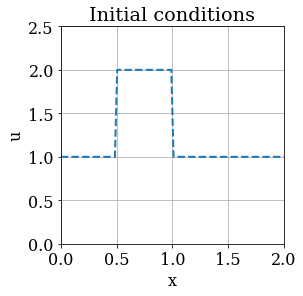

In [7]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [8]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

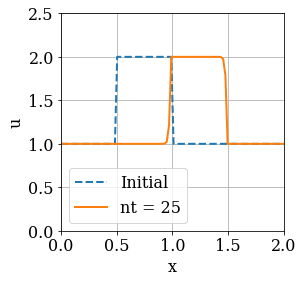

In [9]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [10]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.02  # time-step size

x = numpy.linspace(0.0, L, num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

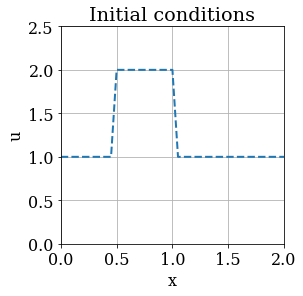

In [11]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [12]:
for n in range(1, nt):  
  un = u.copy() 
  for i in range(1, nx): 
    u[i] = un[i] - un[i]*dt/dx*(un[i]-un[i-1])

In [13]:
# Compute the solution using Euler's method and array slicing.
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])

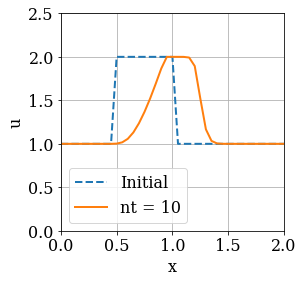

In [14]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [15]:
def linear_convection(nx, L=2.0, c=1.0, dt=0.025, nt=20):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

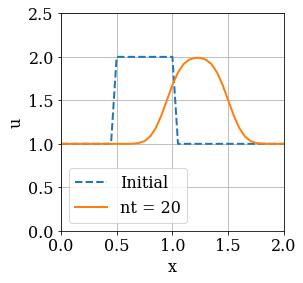

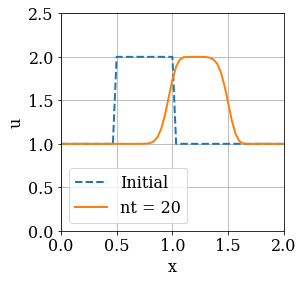

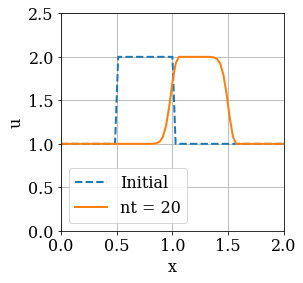

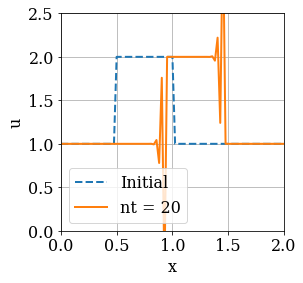

In [16]:
for i in [41,61,71,85]:
    linear_convection(i)  # solve using 41 spatial grid points

In [17]:
def linear_convection_cfl(nx, L=2.0, c=1.0, sigma=0.5, nt=20):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).
    Here, the time-step size is calculated based on a CFL constraint.

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    sigma : float, optional
        CFL constraint; default: 0.5.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    # Compute the time-step size based on the CFL constraint.
    dt = sigma * dx / c
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

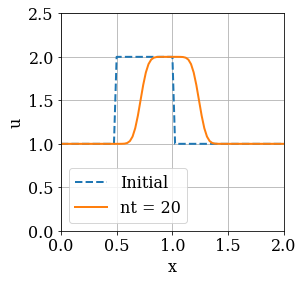

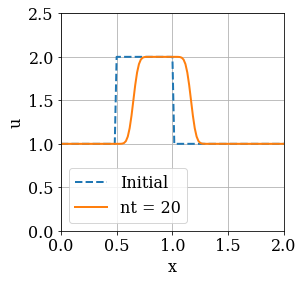

In [18]:
linear_convection_cfl(85)
linear_convection_cfl(121)

In [19]:
# Set parameters.
nx = 41  # number spatial grid points
L = 2.0  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.3  # viscosity
sigma = 0.2  # CFL limit
dt = sigma * dx**2 / nu  # time-step size
nt = 20  # number of time steps to compute

# Get the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

# Set the initial conditions.
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

In [20]:
# Integrate in time.
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + nu * dt / dx**2 * (u[2:] - 2 * u[1:-1] + u[:-2])

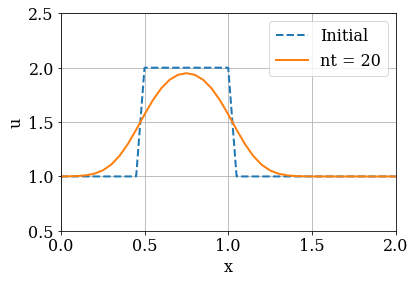

In [21]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend(loc='upper right')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5);

In [22]:
from matplotlib import animation
from IPython.display import HTML

In [23]:
def diffusion(u0, sigma=0.5, nt=20):
    """
    Computes the numerical solution of the 1D diffusion equation
    over the time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        The initial conditions as a 1D array of floats.
    sigma : float, optional
        The value of nu * dt / dx^2;
        default: 0.5.
    nt : integer, optional
        The number of time steps to compute;
        default: 20.
    
    Returns
    -------
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist

In [24]:
# Compute the history of the numerical solution.
u_hist = diffusion(u0, sigma=sigma, nt=nt)

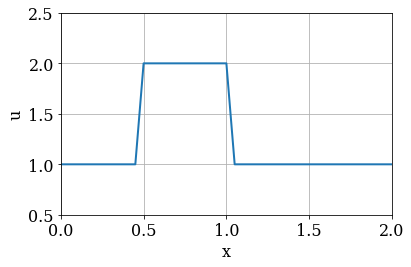

In [25]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
line = pyplot.plot(x, u0,color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)
fig.tight_layout()

In [26]:
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

In [27]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,frames=nt, fargs=(u_hist,),interval=100)

In [28]:
# Display the video.
HTML(anim.to_html5_video())

In [29]:
import sympy

In [41]:
sympy.init_printing()

In [50]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) + sympy.exp(-(x - 4 * t - 2 * numpy.pi)**2 / (4 * nu * (t + 1))))
phi

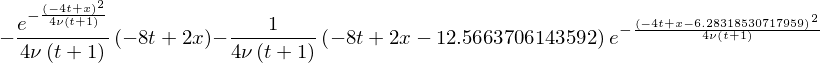

In [43]:
phiprime = phi.diff(x)
phiprime

In [48]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-0.14*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [45]:
u_lamb = lambdify((t, x, nu), u)
print('The value of u at t=1, x=4, nu=3 is {}'.format(u_lamb(1, 4, 3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494


In [52]:
# Set parameters.
nx = 101  # number of spatial grid points
L = 2.0 * numpy.pi  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.07  # viscosity
nt = 100  # number of time steps to compute
sigma = 0.1  # CFL limit
dt = sigma * dx**2 / nu  # time-step size

# Discretize the domain.
x = numpy.linspace(0.0, L, num=nx)

In [53]:
[u_lamb(t, x0, nu) for x0 in x]

AttributeError: 'Mul' object has no attribute 'exp'

In [54]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

AttributeError: 'Mul' object has no attribute 'exp'

In [55]:
# Set initial conditions.
t = 0.0
u0 = numpy.array([u_lamb(t, xi, nu) for xi in x])
u0

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

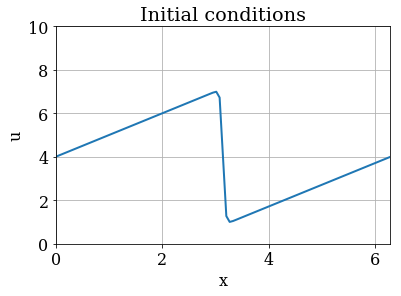

In [56]:
# Plot the initial conditions.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);

In [57]:
# Integrate the Burgers' equation in time.
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # Update all interior points.
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    # Update boundary points.
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
            un[-1] * dt / dx * (un[-1] - un[-2]) +
            nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

In [58]:
# Compute the analytical solution.
u_analytical = numpy.array([u_lamb(nt * dt, xi, nu) for xi in x])

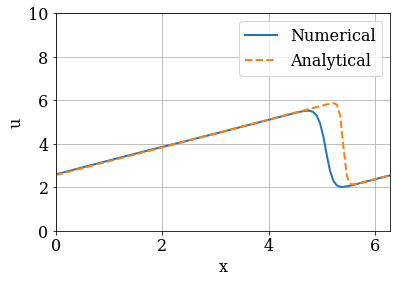

In [59]:
# Plot the numerical solution along with the analytical solution.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, u_analytical, label='Analytical',
            color='C1', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);

In [60]:
def burgers(u0, dx, dt, nu, nt=20):
    """
    Computes the numerical solution of the 1D Burgers' equation
    over the time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        The initial conditions as a 1D array of floats.
    dx : float
        The grid spacing.
    dt : float
        The time-step size.
    nu : float
        The viscosity.
    nt : integer, optional
        The number of time steps to compute;
        default: 20.
    
    Returns
    -------
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # Update all interior points.
        u[1:-1] = (un[1:-1] -
                   un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
                   nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
        # Update boundary points.
        u[0] = (un[0] -
                un[0] * dt / dx * (un[0] - un[-1]) +
                nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
        u[-1] = (un[-1] -
                un[-1] * dt / dx * (un[-1] - un[-2]) +
                nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))
        u_hist.append(u.copy())
    return u_hist

In [61]:
# Compute the history of the numerical solution.
u_hist = burgers(u0, dx, dt, nu, nt=nt)

In [62]:
# Compute the history of the analytical solution.
u_analytical = [numpy.array([u_lamb(n * dt, xi, nu) for xi in x]) for n in range(nt)]

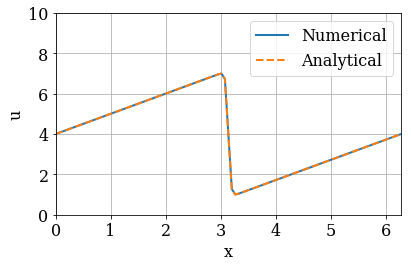

In [63]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
u0_analytical = numpy.array([u_lamb(0.0, xi, nu) for xi in x])
line1 = pyplot.plot(x, u0, label='Numerical',
                    color='C0', linestyle='-', linewidth=2)[0]
line2 = pyplot.plot(x, u0_analytical, label='Analytical',
                    color='C1', linestyle='--', linewidth=2)[0]
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0)
fig.tight_layout()

In [64]:
def update_plot(n, u_hist, u_analytical):
    """
    Update the lines y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    u_analytical : list of numpy.ndarray objects
        The history of the analytical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analytical[n])

In [67]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,frames=nt, fargs=(u_hist, u_analytical),interval=100)

In [68]:
# Display the video.
HTML(anim.to_html5_video())

In [69]:
%%timeit
# Set initial conditions.
u = numpy.array([u_lamb(t, x0, nu) for x0 in x])
# Integrate in time using a nested for loop.
for n in range(nt):
    un = u.copy()
    # Update all interior points and the left boundary point.
    for i in range(nx - 1):
        u[i] = (un[i] -
                un[i] * dt / dx *(un[i] - un[i - 1]) +
                nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]))
    # Update the right boundary.
    u[-1] = (un[-1] -
             un[-1] * dt / dx * (un[-1] - un[-2]) +
             nu * dt / dx**2 * (un[0]- 2 * un[-1] + un[-2]))

100 loops, best of 3: 14.3 ms per loop


In [70]:
%%timeit
# Set initial conditions.
u = numpy.array([u_lamb(t, xi, nu) for xi in x])
# Integrate in time using array operations.
for n in range(nt):
    un = u.copy()
    # Update all interior points.
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    # Update boundary points.
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
            un[-1] * dt / dx * (un[-1] - un[-2]) +
            nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))



1000 loops, best of 3: 1.7 ms per loop
